In [1]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import cv2 
import tqdm
import os
import glob
import ast

In [2]:
## Function: Convert image in 2D fast fourier transform signal
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def Convert2Dfft(img_path1, img_path2):
    img1 =  cv2.imread(img_path1).astype(np.float64)  # BGR, float
    #print(img1.shape)
    img2 =  cv2.imread(img_path2).astype(np.float64)  # BGR, float
    #print(img1.shape)
    img_green = np.absolute(img2[:, :, 1] - img1[:, :, 1])  # g = |g2 - g1|
    _img_green = img_green.astype(np.uint8)  # convert back to uint8
    ft = calculate_2dft(_img_green)
    ft2 = np.power(abs(ft), 2)   ## เก็บค่านี้ 
    return ft2

In [3]:
pth2dt = '/media/SSD/rheology2023/P0100_D0_30HZ_20XINF_UWELL_20221222_174014_MSDT.json'
pth2dataset = "/home/kannika/codes_AI/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-Dataset-6Fold.csv"
pth2save = "/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup"
pth2saveCSV = "/home/kannika/codes_AI/Rheology_Blood"

In [4]:
 '''
 Read files Stamp time 
 '''
    
f = open (pth2dt, "r")
# Reading from file
data = json.loads(f.read())
dfMSDT = pd.DataFrame(data)
print(f"MSDT .json : {dfMSDT.shape}")
dfMSDT

MSDT .json : (29, 4)


,meanM,it,dt,t
0,-0.030871,"[1, 101, 201, 301, 401, 501, 601, 701, 801, 90...",1,0.022343
1,0.001244,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",2,0.045344
2,0.070178,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",3,0.062919
3,0.234865,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",5,0.122015
4,0.277513,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",6,0.144176
5,0.305667,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",7,0.164181
6,0.448577,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",10,0.262939
7,0.486765,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",12,0.332641
8,0.693929,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",15,0.415230
9,0.936022,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",19,0.552848


In [5]:
dfMSDT = dfMSDT[dfMSDT["dt"]<=10].reset_index(drop=True)
print(dfMSDT.shape)
dfMSDT

(7, 4)


,meanM,it,dt,t
0,-0.030871,"[1, 101, 201, 301, 401, 501, 601, 701, 801, 90...",1,0.022343
1,0.001244,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",2,0.045344
2,0.070178,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",3,0.062919
3,0.234865,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",5,0.122015
4,0.277513,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",6,0.144176
5,0.305667,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",7,0.164181
6,0.448577,"[1, 100, 199, 298, 397, 496, 595, 694, 793, 89...",10,0.262939


In [6]:
def get_completeFolder(dataset_SSD):
    df_SSD_Backup__ = dataset_SSD[dataset_SSD["complete"]!='no'].reset_index(drop=True)
    print(f"With Shape ==> {df_SSD_Backup__.shape}")
    classes = list(set(df_SSD_Backup__["classes"]))
    len_cls = []
    for cls in classes:
        print(f"[INFO]: For **{cls}** Classes")
        cls_df = df_SSD_Backup__[df_SSD_Backup__["classes"]==cls]
        set_folder = list(set(cls_df["image_folder"]))
        print(f"HAvE {len(set_folder)} Folder")
        len_cls.append(len(set_folder))
        print("#"*50)
    print(f"Sum of Folder ==> {sum(len_cls)} Folder")
    
    return df_SSD_Backup__

In [7]:
### *Step 2 ==> import data folder : Glycerol
Dataset = pd.read_csv(pth2dataset) ## Config
Dataset = get_completeFolder(Dataset)
##1080537
Dataset.head()

With Shape ==> (1076538, 11)
[INFO]: For **NBL** Classes
HAvE 201 Folder
##################################################
[INFO]: For **HN** Classes
HAvE 337 Folder
##################################################
Sum of Folder ==> 538 Folder


,Unnamed: 0,Unnamed: 0.1,image_name,image_path,image_folder,folder_source,classes,complete,Code,subclass,fold
0,0,0,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
1,1,1,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
2,2,2,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
3,3,3,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
4,4,4,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2


In [18]:
datafolder = list(set(Dataset['image_folder']))
DFfolder = Dataset[Dataset["image_folder"]==datafolder[0]].reset_index(drop=True)
print(DFfolder.shape)
#DFfolder.head()
img_path = DFfolder["image_path"].tolist()
img_path.sort()
print(len(img_path))
img_path

(2001, 11)
2001


['/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000001.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000002.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000003.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000004.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000005.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000006.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000007.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000000008.jpg',
 '/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_000000000

In [37]:
DFfolder

,Unnamed: 0,Unnamed: 0.1,image_name,image_path,image_folder,folder_source,classes,complete,Code,subclass,fold
0,194097,194097,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
1,194098,194098,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
2,194099,194099,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
3,194100,194100,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
4,194101,194101,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
...,...,...,...,...,...,...,...,...,...,...,...
1996,196093,196093,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
1997,196094,196094,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
1998,196095,196095,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3
1999,196096,196096,HN02_D0_30HZ_20XINF_UWELL_20221027_180249_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN02_D0_30HZ_20XINF_UWELL_20221027_180249,SSD_Backup,HN,yes,HN02,Splenectomy,3


In [39]:
print(set(DFfolder["folder_source"]))
print(set(DFfolder["classes"]))
print(set(DFfolder["Code"]))
print(set(DFfolder["subclass"]))
print(set(DFfolder["fold"]))

{'SSD_Backup'}
{'HN'}
{'HN02'}
{'Splenectomy'}
{3}


In [50]:
image_name_, image_path_, image_folder_, folder_source_, classes_, Code_, subclass_, fold_ = [],[],[],[],[],[],[],[]

folder_source = list(set(DFfolder["folder_source"]))
folder_source_i = folder_source[0]
print(folder_source_i)

classes = list(set(DFfolder["classes"]))
classes_i = classes[0]
print(classes_i)

Code = list(set(DFfolder["Code"]))
Code_i = Code[0]
print(Code_i)

subclass = list(set(DFfolder["subclass"]))
subclass_i = subclass[0]
print(subclass_i)

fold = list(set(DFfolder["fold"]))
fold_i = fold[0]
print(fold_i)

SSD_Backup
HN
HN02
Splenectomy
3


In [51]:
# for img in img_path:
#     img_ = img.split("/")[-1]
#     createName = f"{pth2save}/{datafolder[0]}/{img_}"
#     print(createName)

In [16]:
datafolder[0]

'HN02_D0_30HZ_20XINF_UWELL_20221027_180249'

In [20]:
pth2save

'/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup'

In [22]:
mkdir_pthFFT = f"{pth2save}/{datafolder[0]}"
mkdir_pthFFT

'/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249'

In [23]:
mkdir_pthnumpy = mkdir_pthFFT.replace('2dFFT_dataset', "npyfiles_dataset")
mkdir_pthnumpy

'/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249'

In [25]:
for i in range(len(dfMSDT)):
    avgFFT_dt = list()  ## array == 20 ids 
    idt = dfMSDT['dt'][i] ## number idt 
    list_initTime = dfMSDT['it'][i]   ##a list 
    for t in list_initTime:
        #print(t)
        ## 1. Init images
        init_img = t-1
        img_path1 = img_path[init_img]
        ## 2. idt images
        idt_img = init_img+idt
        img_path2 = img_path[idt_img]
        FFT = Convert2Dfft(img_path1, img_path2)  # Use function 
        avgFFT_dt.append(FFT)
    DDM_dt = np.sum(avgFFT_dt, axis=0)/len(avgFFT_dt)
    ## NUMPY SAVE and FFT images save 
    base_folder = datafolder[0]
    #savepth = datafolder.replace('Glycerol', FolName2Save)
    mkdir_pthFFT = f"{pth2save}/{base_folder}"
    mkdir_pthnumpy = mkdir_pthFFT.replace('2dFFT_dataset', "npyfiles_dataset")
    ##---** Create Folder to Save 
    import imageio
    os.makedirs(mkdir_pthnumpy, exist_ok=True)
    os.makedirs(mkdir_pthFFT, exist_ok=True)
    ### Create Name to save
    numpy_name = mkdir_pthnumpy+'/'+base_folder+'_idt'+str(idt)+'.npy'
    print(f"Save Numpy images as ==> [{numpy_name}]") 
    img_name = mkdir_pthFFT+'/'+base_folder+'_idt'+str(idt)+'.png'
    print(f"Save FFT images as ==> [{img_name}]") 
    ##-- NUMPY SAVE
    np.save(numpy_name, DDM_dt)
    ## images SAVE to .png
    output_image = np.log(DDM_dt)
    imageio.imwrite(img_name, output_image) 
    print("="*125)
    
print(f"Prepare FFT Images : ===> DONE!!  <===")

Lossy conversion from float64 to uint8. Range [12.495429032250087, 28.639537986629342]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1.png]


Lossy conversion from float64 to uint8. Range [12.677582073702231, 28.813342740862286]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt2.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt2.png]


Lossy conversion from float64 to uint8. Range [12.633372679198596, 28.931308211689522]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt3.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt3.png]


Lossy conversion from float64 to uint8. Range [12.702477936451752, 29.109248355825958]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt5.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt5.png]


Lossy conversion from float64 to uint8. Range [12.709921876699491, 29.20514281633733]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt6.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt6.png]


Lossy conversion from float64 to uint8. Range [12.666773783807205, 29.293321358166246]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt7.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt7.png]


Lossy conversion from float64 to uint8. Range [12.639913354844365, 29.53451973094561]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt10.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt10.png]


Lossy conversion from float64 to uint8. Range [12.596591732681235, 29.668471237533744]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt12.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt12.png]


Lossy conversion from float64 to uint8. Range [12.713948120418147, 29.85464017943482]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt15.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt15.png]


Lossy conversion from float64 to uint8. Range [12.66110926045061, 30.057377025675013]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt19.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt19.png]


Lossy conversion from float64 to uint8. Range [12.59190373339233, 30.43727133249025]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt25.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt25.png]


Lossy conversion from float64 to uint8. Range [12.951201694267013, 30.613193791699267]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt31.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt31.png]


Lossy conversion from float64 to uint8. Range [12.875561514411354, 30.79302232868514]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt39.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt39.png]


Lossy conversion from float64 to uint8. Range [13.030319660664174, 31.000136407784137]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt50.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt50.png]


Lossy conversion from float64 to uint8. Range [13.109692456208395, 31.17764892611284]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt63.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt63.png]


Lossy conversion from float64 to uint8. Range [12.964442192558566, 31.349084070413102]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt79.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt79.png]


Lossy conversion from float64 to uint8. Range [13.165750882239076, 31.51492197246176]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt100.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt100.png]


Lossy conversion from float64 to uint8. Range [13.050942025953178, 31.661663829901144]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt125.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt125.png]


Lossy conversion from float64 to uint8. Range [13.182150198535533, 31.75705360753947]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt158.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt158.png]


Lossy conversion from float64 to uint8. Range [13.242954609707866, 31.822413338565443]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt199.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt199.png]


Lossy conversion from float64 to uint8. Range [13.302389185389622, 31.861056083862703]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt251.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt251.png]


Lossy conversion from float64 to uint8. Range [13.315939366163061, 31.873200708546054]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt316.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt316.png]


Lossy conversion from float64 to uint8. Range [13.3155684518417, 31.880603862278882]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt398.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt398.png]


Lossy conversion from float64 to uint8. Range [13.322642175039082, 31.87453606601413]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt501.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt501.png]


Lossy conversion from float64 to uint8. Range [13.173518469839324, 31.886944182276892]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt630.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt630.png]


Lossy conversion from float64 to uint8. Range [13.30673229483305, 31.894104194428103]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt794.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt794.png]


Lossy conversion from float64 to uint8. Range [13.194551470474979, 31.901946349898353]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1000.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1000.png]


Lossy conversion from float64 to uint8. Range [13.192974460807472, 31.91064242173119]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1258.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1258.png]


Lossy conversion from float64 to uint8. Range [13.208838208801591, 31.914749551071818]. Convert image to uint8 prior to saving to suppress this warning.


Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1584.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1584.png]
Prepare FFT Images : ===> DONE!!  <===


In [30]:
import cv2 
import PIL
from PIL import Image

%matplotlib inline
from matplotlib import pyplot as plt

(800, 800)


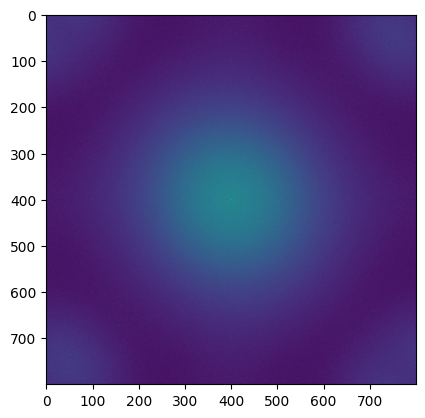

In [33]:
output_image
print(output_image.shape)
#img_name = '/media/SSD/rheology2023/Glycerol_FFT/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_083046/FFT/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_083046_idt1584.png'
#imgidt_test = cv2.imread(img_name)
#plt.imshow(imgidt_test,cmap='gray')  
plt.imshow(output_image)  

In [34]:
img_name

'/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1584.png'

(800, 800, 3)


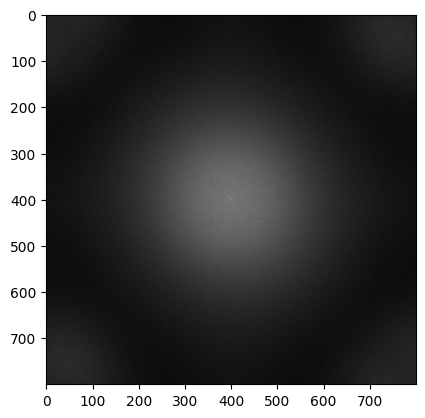

In [36]:
#img_name = '/media/SSD/rheology2023/Glycerol_FFT/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_083046/FFT/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_083046_idt1584.png'
imgidt_test = cv2.imread(img_name)
print(imgidt_test.shape)
#plt.imshow(imgidt_test,cmap='gray')  
plt.imshow(imgidt_test)  

In [27]:
numpy_name

'/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN02_D0_30HZ_20XINF_UWELL_20221027_180249/HN02_D0_30HZ_20XINF_UWELL_20221027_180249_idt1584.npy'

In [28]:
# LOAD NUMPY ARRAY
LOADNUMPYARRAY = np.load(numpy_name, allow_pickle = True)
LOADNUMPYARRAY

array([[2.19213338e+09, 9.02902763e+06, 9.74016559e+06, ...,
        7.36128968e+06, 9.74016559e+06, 9.02902763e+06],
       [1.13470090e+07, 1.05263358e+07, 9.17177207e+06, ...,
        6.83934384e+06, 8.57224023e+06, 5.21441099e+06],
       [8.10610536e+06, 6.45926917e+06, 8.01533006e+06, ...,
        9.82083350e+06, 6.55812823e+06, 1.22107923e+07],
       ...,
       [9.02623890e+06, 5.76866748e+06, 1.11828578e+07, ...,
        1.01205571e+07, 6.84378857e+06, 8.11089853e+06],
       [8.10610536e+06, 1.22107923e+07, 6.55812823e+06, ...,
        1.04849142e+07, 8.01533006e+06, 6.45926917e+06],
       [1.13470090e+07, 5.21441099e+06, 8.57224023e+06, ...,
        8.48826340e+06, 9.17177207e+06, 1.05263358e+07]])

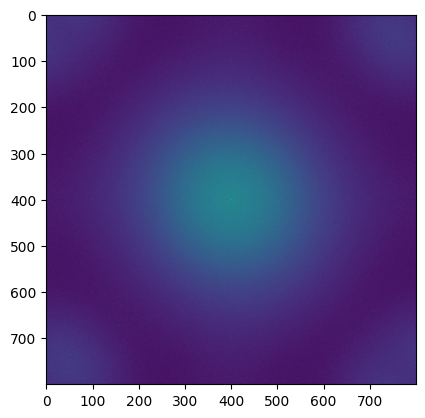

In [31]:
plt.imshow(np.log(LOADNUMPYARRAY)) 

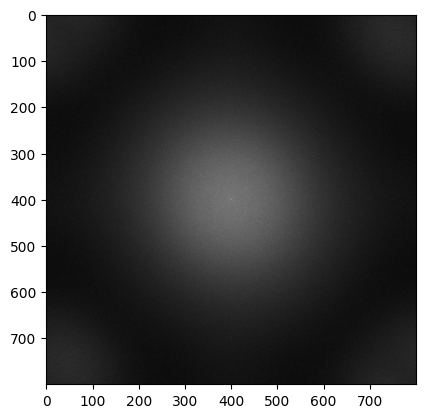

In [32]:
plt.imshow(np.log(LOADNUMPYARRAY),cmap='gray')

In [54]:
def plot_img(lst_img):  
    '''
    Plot 25 images
    '''
    w = 10
    h = 10
    fig = plt.figure(figsize=(12, 15))
    columns = 5
    rows = 5
    for i in range(0, columns*rows):
        img =  cv2.imread(lst_img[i])
        screen = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(screen)
    plt.show()

# 🩸💾 Function: 2dFFT Blood Viscosity

In [ ]:
image_name_, image_path_, image_folder_, folder_source_, classes_, Code_, subclass_, fold_ = [],[],[],[],[],[],[],[]

Dataset = pd.read_csv(pth2dataset)
datafolder = list(set(Dataset['image_folder']))
for k in range(len(datafolder)):
    DFfolder = Dataset[Dataset["image_folder"]==datafolder[k]].reset_index(drop=True)
    #print(DFfolder.shape)
    #DFfolder.head()
    img_path = DFfolder["image_path"].tolist()
    img_path.sort()
    
    ## Set elment to save as DataFrame
    folder_source = list(set(DFfolder["folder_source"]))
    folder_source_i = folder_source[0]
    classes = list(set(DFfolder["classes"]))
    classes_i = classes[0]
    Code = list(set(DFfolder["Code"]))
    Code_i = Code[0]
    subclass = list(set(DFfolder["subclass"]))
    subclass_i = subclass[0]
    fold = list(set(DFfolder["fold"]))
    fold_i = fold[0]
    
    '''
    Run 2dFFT 
    '''
    
    for i in range(len(dfMSDT)):
        avgFFT_dt = list()  ## array == 20 ids 
        idt = dfMSDT['dt'][i] ## number idt 
        list_initTime = dfMSDT['it'][i]   ##a list 
        for t in list_initTime:
            #print(t)
            ## 1. Init images
            init_img = t-1
            img_path1 = img_path[init_img]
            ## 2. idt images
            idt_img = init_img+idt
            img_path2 = img_path[idt_img]
            FFT = Convert2Dfft(img_path1, img_path2)  # Use function 
            avgFFT_dt.append(FFT)
        DDM_dt = np.sum(avgFFT_dt, axis=0)/len(avgFFT_dt)
        ## NUMPY SAVE and FFT images save 
        base_folder = datafolder[k]
        #savepth = datafolder.replace('Glycerol', FolName2Save)
        mkdir_pthFFT = f"{pth2save}/{base_folder}"
        mkdir_pthnumpy = mkdir_pthFFT.replace('2dFFT_dataset', "npyfiles_dataset")
        ##---** Create Folder to Save 
        import imageio
        os.makedirs(mkdir_pthnumpy, exist_ok=True)
        os.makedirs(mkdir_pthFFT, exist_ok=True)
        ### Create Name to save
        numpy_name = mkdir_pthnumpy+'/'+base_folder+'_idt'+str(idt)+'.npy'
        print(f"Save Numpy images as ==> [{numpy_name}]") 
        img_name = mkdir_pthFFT+'/'+base_folder+'_idt'+str(idt)+'.png'
        print(f"Save FFT images as ==> [{img_name}]") 
        ##-- NUMPY SAVE
        np.save(numpy_name, DDM_dt)
        ## images SAVE to .png
        output_image = np.log(DDM_dt)
        imageio.imwrite(img_name, output_image) 
        print("="*125)
        ## Createa Data 
        image_name_.append(base_folder+'_idt'+str(idt)+'.png') 
        image_path_.append(img_name)  
        image_folder_.append(base_folder)  
        folder_source_.append(folder_source_i)  
        classes_.append(classes_i)  
        Code_.append(Code_i)  
        subclass_.append(subclass_i)  
        fold_.append(fold_i)   
    print(f"Prepare 2dFFT Images : ===> DONE!!  <===")
## Create Data Frame
dict = {'image_name': image_name_, 'image_path': image_path_, 'image_folder': image_folder_, 'folder_source':folder_source_,
         'classes':classes_, 'Code_':Code_,. 'subclass_':subclass_, 'fold':fold_}
df_2dFFT = pd.DataFrame(dict)
print(f"[INFO]: 2dFFT Dataset : Blood Viscosity ==> With Shape {df_2dFFT.shape}")
pth2saveCSV_ = f"{pth2saveCSV}/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-6Fold.csv"
df_2dFFT.to_csv(pth2saveCSV_)
print(f"Save Dataframe : DONE!!! at {pth2saveCSV_}")

------------------

In [7]:
''' 
Save Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_idt630.npy]
Save FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_idt630.png]
Lossy conversion from float64 to uint8. Range [13.552384947539345, 31.123480619123463]. Convert image to uint8 prior to saving to suppress this warning.
=============================================================================================================================
Traceback (most recent call last):
  File "FFT-Blood_viscosity-Datatest.py", line 157, in <module>
    main()
  File "FFT-Blood_viscosity-Datatest.py", line 112, in main
    FFT = Convert2Dfft(img_path1, img_path2)  # Use function
  File "FFT-Blood_viscosity-Datatest.py", line 33, in Convert2Dfft
    img2 =  cv2.imread(img_path2).astype(np.float64)  # BGR, float
AttributeError: 'NoneType' object has no attribute 'astype'
'''

' \nSave Numpy images as ==> [/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_idt630.npy]\nSave FFT images as ==> [/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_idt630.png]\nLossy conversion from float64 to uint8. Range [13.552384947539345, 31.123480619123463]. Convert image to uint8 prior to saving to suppress this warning.\n=============================================================================================================================\nTraceback (most recent call last):\n  File "FFT-Blood_viscosity-Datatest.py", line 157, in <module>\n    main()\n  File "FFT-Blood_viscosity-Datatest.py", line 112, in main\n    FFT = Convert2Dfft(img_path1, img_path2)  # Use function\n  File "FFT-Blood_viscosity-Datatest.py", line 33, in Convert2Dfft\n    img2 =  cv2.imread(img_pat

- Check : NBL11_D0_30HZ_20XINF_UWELL_25651201_134942

In [8]:
Dataset.head()

,Unnamed: 0,Unnamed: 0.1,image_name,image_path,image_folder,folder_source,classes,complete,Code,subclass,fold
0,0,0,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
1,1,1,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
2,2,2,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
3,3,3,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2
4,4,4,HN34_D0_30HZ_20XINF_UWELL_25660131_155730_0000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,HN34_D0_30HZ_20XINF_UWELL_25660131_155730,SSD_Backup,HN,yes,HN34,No_Splenectomy,2


In [11]:
A="NBL11_D0_30HZ_20XINF_UWELL_25651201_134942"
DF_NBL11 = Dataset[Dataset["image_folder"]==A].reset_index(drop=True)
print(DF_NBL11.shape)
DF_NBL11.head()

(2001, 11)


,Unnamed: 0,Unnamed: 0.1,image_name,image_path,image_folder,folder_source,classes,complete,Code,subclass,fold
0,988494,988494,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942,SSD_Backup,NBL,yes,NBL11,Normal,5
1,988495,988495,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942,SSD_Backup,NBL,yes,NBL11,Normal,5
2,988496,988496,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942,SSD_Backup,NBL,yes,NBL11,Normal,5
3,988497,988497,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942,SSD_Backup,NBL,yes,NBL11,Normal,5
4,988498,988498,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_000...,/media/HDD/rheology2023/Blood_Viscosity/SSD_Ba...,NBL11_D0_30HZ_20XINF_UWELL_25651201_134942,SSD_Backup,NBL,yes,NBL11,Normal,5


In [15]:
except_img = []
for i in range(len(DF_NBL11)): 
    print(f"[INFO]: images file {i+1}")
    imgpth =  DF_NBL11["image_path"][i]
    try:
        img = cv2.imread(imgpth).astype(np.float64)  # BGR, float
    except:
        except_img.append(imgpth)

[INFO]: images file 1
[INFO]: images file 2
[INFO]: images file 3
[INFO]: images file 4
[INFO]: images file 5
[INFO]: images file 6
[INFO]: images file 7
[INFO]: images file 8
[INFO]: images file 9
[INFO]: images file 10
[INFO]: images file 11
[INFO]: images file 12
[INFO]: images file 13
[INFO]: images file 14
[INFO]: images file 15
[INFO]: images file 16
[INFO]: images file 17
[INFO]: images file 18
[INFO]: images file 19
[INFO]: images file 20
[INFO]: images file 21
[INFO]: images file 22
[INFO]: images file 23
[INFO]: images file 24
[INFO]: images file 25
[INFO]: images file 26
[INFO]: images file 27
[INFO]: images file 28
[INFO]: images file 29
[INFO]: images file 30
[INFO]: images file 31
[INFO]: images file 32
[INFO]: images file 33
[INFO]: images file 34
[INFO]: images file 35
[INFO]: images file 36
[INFO]: images file 37
[INFO]: images file 38
[INFO]: images file 39
[INFO]: images file 40
[INFO]: images file 41
[INFO]: images file 42
[INFO]: images file 43
[INFO]: images file 

[INFO]: images file 361
[INFO]: images file 362
[INFO]: images file 363
[INFO]: images file 364
[INFO]: images file 365
[INFO]: images file 366
[INFO]: images file 367
[INFO]: images file 368
[INFO]: images file 369
[INFO]: images file 370
[INFO]: images file 371
[INFO]: images file 372
[INFO]: images file 373
[INFO]: images file 374
[INFO]: images file 375
[INFO]: images file 376
[INFO]: images file 377
[INFO]: images file 378
[INFO]: images file 379
[INFO]: images file 380
[INFO]: images file 381
[INFO]: images file 382
[INFO]: images file 383
[INFO]: images file 384
[INFO]: images file 385
[INFO]: images file 386
[INFO]: images file 387
[INFO]: images file 388
[INFO]: images file 389
[INFO]: images file 390
[INFO]: images file 391
[INFO]: images file 392
[INFO]: images file 393
[INFO]: images file 394
[INFO]: images file 395
[INFO]: images file 396
[INFO]: images file 397
[INFO]: images file 398
[INFO]: images file 399
[INFO]: images file 400
[INFO]: images file 401
[INFO]: images f

[INFO]: images file 721
[INFO]: images file 722
[INFO]: images file 723
[INFO]: images file 724
[INFO]: images file 725
[INFO]: images file 726
[INFO]: images file 727
[INFO]: images file 728
[INFO]: images file 729
[INFO]: images file 730
[INFO]: images file 731
[INFO]: images file 732
[INFO]: images file 733
[INFO]: images file 734
[INFO]: images file 735
[INFO]: images file 736
[INFO]: images file 737
[INFO]: images file 738
[INFO]: images file 739
[INFO]: images file 740
[INFO]: images file 741
[INFO]: images file 742
[INFO]: images file 743
[INFO]: images file 744
[INFO]: images file 745
[INFO]: images file 746
[INFO]: images file 747
[INFO]: images file 748
[INFO]: images file 749
[INFO]: images file 750
[INFO]: images file 751
[INFO]: images file 752
[INFO]: images file 753
[INFO]: images file 754
[INFO]: images file 755
[INFO]: images file 756
[INFO]: images file 757
[INFO]: images file 758
[INFO]: images file 759
[INFO]: images file 760
[INFO]: images file 761
[INFO]: images f

[INFO]: images file 1081
[INFO]: images file 1082
[INFO]: images file 1083
[INFO]: images file 1084
[INFO]: images file 1085
[INFO]: images file 1086
[INFO]: images file 1087
[INFO]: images file 1088
[INFO]: images file 1089
[INFO]: images file 1090
[INFO]: images file 1091
[INFO]: images file 1092
[INFO]: images file 1093
[INFO]: images file 1094
[INFO]: images file 1095
[INFO]: images file 1096
[INFO]: images file 1097
[INFO]: images file 1098
[INFO]: images file 1099
[INFO]: images file 1100
[INFO]: images file 1101
[INFO]: images file 1102
[INFO]: images file 1103
[INFO]: images file 1104
[INFO]: images file 1105
[INFO]: images file 1106
[INFO]: images file 1107
[INFO]: images file 1108
[INFO]: images file 1109
[INFO]: images file 1110
[INFO]: images file 1111
[INFO]: images file 1112
[INFO]: images file 1113
[INFO]: images file 1114
[INFO]: images file 1115
[INFO]: images file 1116
[INFO]: images file 1117
[INFO]: images file 1118
[INFO]: images file 1119
[INFO]: images file 1120


[INFO]: images file 1411
[INFO]: images file 1412
[INFO]: images file 1413
[INFO]: images file 1414
[INFO]: images file 1415
[INFO]: images file 1416
[INFO]: images file 1417
[INFO]: images file 1418
[INFO]: images file 1419
[INFO]: images file 1420
[INFO]: images file 1421
[INFO]: images file 1422
[INFO]: images file 1423
[INFO]: images file 1424
[INFO]: images file 1425
[INFO]: images file 1426
[INFO]: images file 1427
[INFO]: images file 1428
[INFO]: images file 1429
[INFO]: images file 1430
[INFO]: images file 1431
[INFO]: images file 1432
[INFO]: images file 1433
[INFO]: images file 1434
[INFO]: images file 1435
[INFO]: images file 1436
[INFO]: images file 1437
[INFO]: images file 1438
[INFO]: images file 1439
[INFO]: images file 1440
[INFO]: images file 1441
[INFO]: images file 1442
[INFO]: images file 1443
[INFO]: images file 1444
[INFO]: images file 1445
[INFO]: images file 1446
[INFO]: images file 1447
[INFO]: images file 1448
[INFO]: images file 1449
[INFO]: images file 1450


Premature end of JPEG file


[INFO]: images file 1593
[INFO]: images file 1594
[INFO]: images file 1595
[INFO]: images file 1596
[INFO]: images file 1597
[INFO]: images file 1598
[INFO]: images file 1599
[INFO]: images file 1600
[INFO]: images file 1601
[INFO]: images file 1602
[INFO]: images file 1603
[INFO]: images file 1604
[INFO]: images file 1605
[INFO]: images file 1606
[INFO]: images file 1607
[INFO]: images file 1608
[INFO]: images file 1609
[INFO]: images file 1610
[INFO]: images file 1611
[INFO]: images file 1612
[INFO]: images file 1613
[INFO]: images file 1614
[INFO]: images file 1615
[INFO]: images file 1616
[INFO]: images file 1617
[INFO]: images file 1618
[INFO]: images file 1619
[INFO]: images file 1620
[INFO]: images file 1621
[INFO]: images file 1622
[INFO]: images file 1623
[INFO]: images file 1624
[INFO]: images file 1625
[INFO]: images file 1626
[INFO]: images file 1627
[INFO]: images file 1628
[INFO]: images file 1629
[INFO]: images file 1630
[INFO]: images file 1631
[INFO]: images file 1632


[INFO]: images file 1923
[INFO]: images file 1924
[INFO]: images file 1925
[INFO]: images file 1926
[INFO]: images file 1927
[INFO]: images file 1928
[INFO]: images file 1929
[INFO]: images file 1930
[INFO]: images file 1931
[INFO]: images file 1932
[INFO]: images file 1933
[INFO]: images file 1934
[INFO]: images file 1935
[INFO]: images file 1936
[INFO]: images file 1937
[INFO]: images file 1938
[INFO]: images file 1939
[INFO]: images file 1940
[INFO]: images file 1941
[INFO]: images file 1942
[INFO]: images file 1943
[INFO]: images file 1944
[INFO]: images file 1945
[INFO]: images file 1946
[INFO]: images file 1947
[INFO]: images file 1948
[INFO]: images file 1949
[INFO]: images file 1950
[INFO]: images file 1951
[INFO]: images file 1952
[INFO]: images file 1953
[INFO]: images file 1954
[INFO]: images file 1955
[INFO]: images file 1956
[INFO]: images file 1957
[INFO]: images file 1958
[INFO]: images file 1959
[INFO]: images file 1960
[INFO]: images file 1961
[INFO]: images file 1962


In [16]:
print(len(except_img))
except_img

1


['/media/HDD/rheology2023/Blood_Viscosity/SSD_Backup/NBL11_D0_30HZ_20XINF_UWELL_25651201_134942_0000001575.jpg']

## Check DatsFrame. 

In [8]:
dataFFT = pd.read_csv("/home/kannika/codes_AI/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-6Fold.csv")
print(dataFFT.shape)
dataFFT.head()

(3766, 9)


,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code_,subclass_,fold
0,0,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt1...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6
1,1,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt2...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6
2,2,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt3...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6
3,3,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt5...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6
4,4,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt6...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6


In [11]:
print("จำนวน Folder:")
print(len(list(set(dataFFT["image_folder"]))))

จำนวน Folder:
538


In [16]:
# By using str.replace()
dataFFT["image_path"]= dataFFT["image_path"].str.replace('SSD_Backup_3','SSD_Backup')
dataFFT["npyfiles_path"]= dataFFT["image_path"].str.replace('2dFFT_dataset','npyfiles_dataset')
dataFFT["npyfiles_path"]= dataFFT["npyfiles_path"].str.replace('png','npy')
dataFFT.head()

,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code_,subclass_,fold,npyfiles_path
0,0,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt1...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...
1,1,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt2...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...
2,2,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt3...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...
3,3,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt5...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...
4,4,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt6...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...


In [28]:
dataFFT["dt"] = ""
for i in range(len(dataFFT)):
    idt = dataFFT["image_name"][i]
    idt_ = idt.split("_")[-1]
    idt__ = idt_.split(".")[0]
    idt__ = idt__.replace('idt', "")
    dataFFT.loc[dataFFT.index[i], "dt"] = int(idt__)
print(set(dataFFT["dt"]))
dataFFT.head()

{1, 2, 3, 5, 6, 7, 10}


,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code_,subclass_,fold,npyfiles_path,dt
0,0,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt1...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,1
1,1,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt2...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,2
2,2,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt3...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,3
3,3,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt5...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,5
4,4,HN01_D0_30HZ_20XINF_UWELL_20221027_154439_idt6...,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,HN01_D0_30HZ_20XINF_UWELL_20221027_154439,SSD_Backup,HN,HN01,Splenectomy,6,/media/HDD/rheology2023/Blood_Viscosity_2dFFT/...,6


In [29]:
print(set(dataFFT["fold"]))

{1, 2, 3, 4, 5, 6}


In [30]:
print(set(dataFFT["subclass_"]))

{'No_Splenectomy', 'Normal', 'Splenectomy'}


In [31]:
def plot_img(lst_img):
    w = 10
    h = 10
    fig = plt.figure(figsize=(12, 15))
    columns = 4
    rows = 5
    for i in range(0, columns*rows):
        img =  cv2.imread(lst_img[i])
        screen = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(screen)
    plt.show()

20


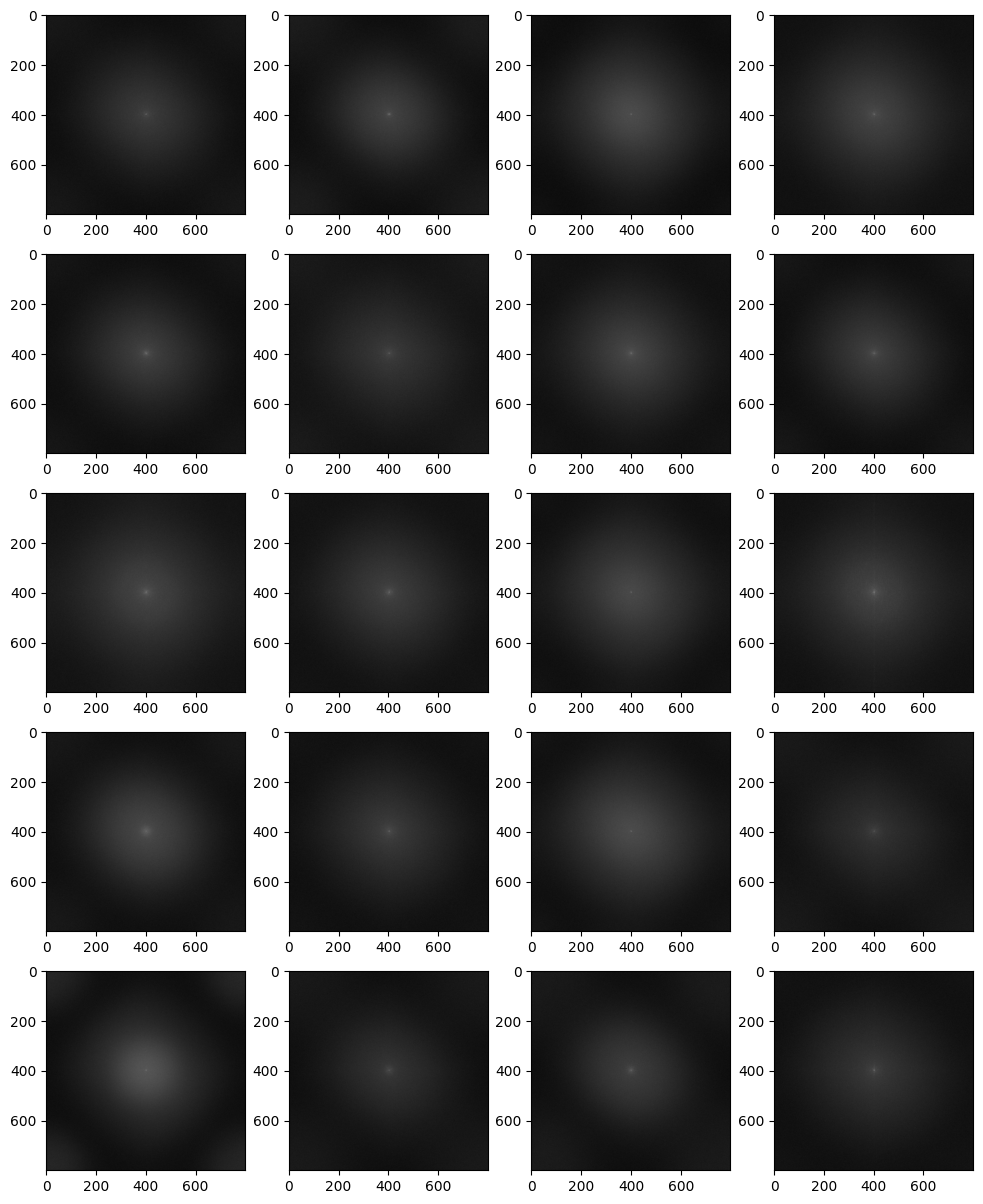

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

n = 20
sample = dataFFT.sample(n, replace=False)
img = sample["image_path"].tolist()
print(len(img))


plot_img(img)

In [34]:
def plot_npy(lst_npy):
    w = 10
    h = 10
    fig = plt.figure(figsize=(12, 15))
    columns = 4
    rows = 5
    for i in range(0, columns*rows):
        # LOAD NUMPY ARRAY
        numpy_name = lst_npy[i]
        LOADNUMPYARRAY = np.load(numpy_name, allow_pickle = True)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.log(LOADNUMPYARRAY))
    plt.show()

20


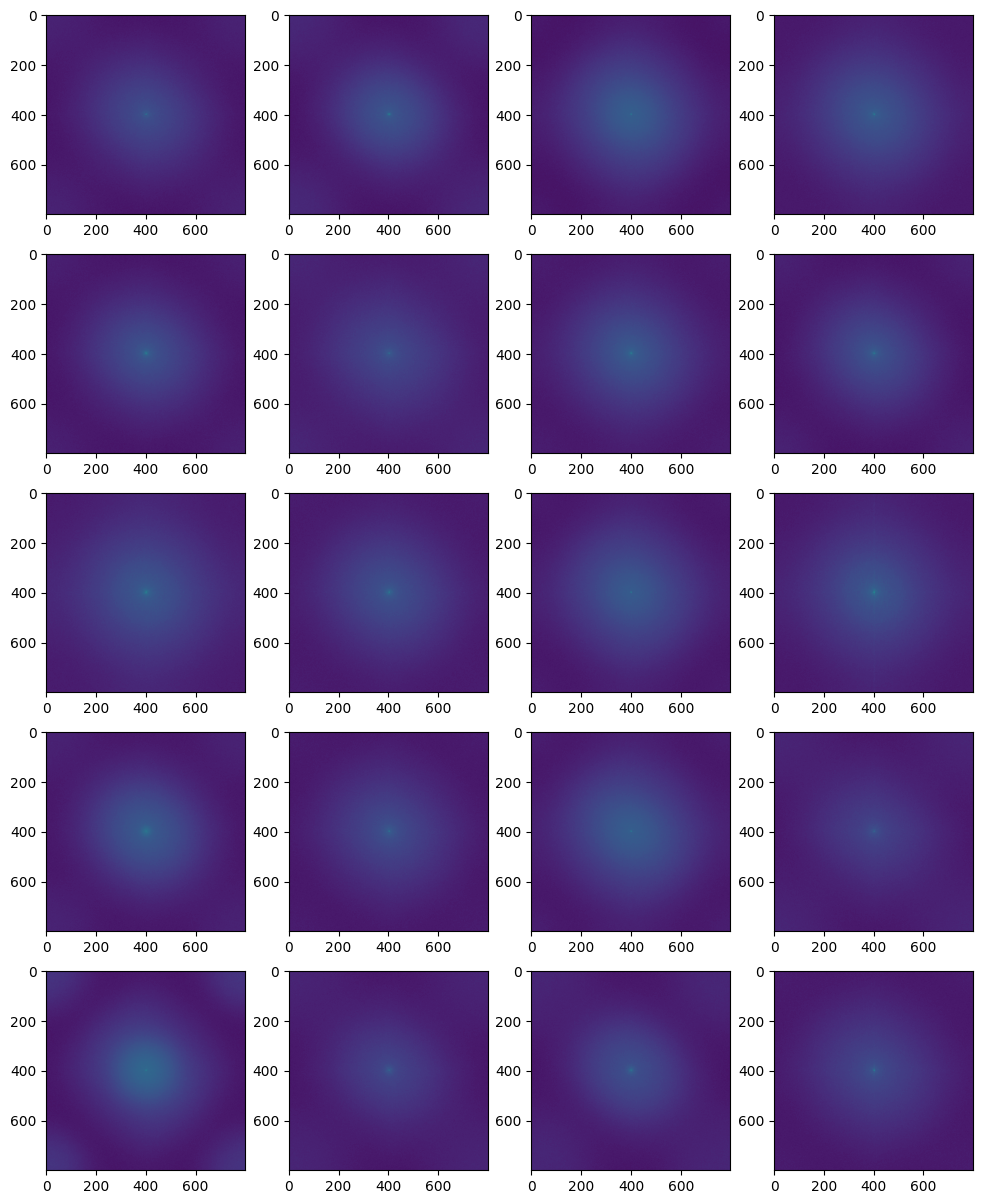

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

n = 20
sample_npy = dataFFT.sample(n, replace=False)
lst_npy = sample["npyfiles_path"].tolist()
print(len(lst_npy))


plot_npy(lst_npy)

----------------------------------------------------------------------------------------------------------------------------------

In [36]:
dataFFT.to_csv("/home/kannika/codes_AI/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-6Fold.csv")

----------------------------------------------------

In [42]:
# datafolder = list(set(Dataset['image_folder']))
# datafolder.sort()
# print(f"Found Validate Dataset: {len(datafolder)} Folder ==> {Dataset.shape[0]} images")
# datafolder

In [43]:
# import glob

# lst_FlderName = []
# baseRoot = "/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup"
# getdir = glob.glob(f"{baseRoot}/*")
# print(len(getdir))
# for j in range(len(getdir)):
#     FlderName = getdir[j].split("/")[-1]
#     lst_FlderName.append(FlderName)

# print(len(lst_FlderName))
# lst_FlderName.sort()
# lst_FlderName

In [44]:
# import glob

# lst_FlderName2 = []
# baseRoot2 = "/media/HDD/rheology2023/Blood_Viscosity_2dFFT/2dFFT_dataset/SSD_Backup_2"
# getdir2 = glob.glob(f"{baseRoot2}/*")
# print(len(getdir2))
# for j in range(len(getdir2)):
#     FlderName = getdir2[j].split("/")[-1]
#     lst_FlderName2.append(FlderName)

# print(len(lst_FlderName2))
# lst_FlderName2.sort()
# lst_FlderName2

In [45]:
# lst_FlderName_residual = lst_FlderName+lst_FlderName2
# lst_FlderName_residual = list(set(lst_FlderName_residual))
# lst_FlderName_residual.sort()
# print(len(lst_FlderName_residual))
# lst_FlderName_residual

In [46]:
# '''
# subtract list Folder Name:
# '''
# set_fode_residual = list(set(datafolder)-set(lst_FlderName_residual))
# set_fode_residual.sort()
# print(len(set_fode_residual))
# set_fode_residual

In [47]:
#len(datafolder)-len(lst_FlderName)

In [48]:
# '''
# subtract list Folder Name:
# '''
# set_foder = list(set(datafolder)-set(lst_FlderName))
# set_foder.sort()
# print(len(set_foder))
# set_foder

In [49]:
# '''
# subtract list Folder Name:
# '''
# set_foder_resi = list(set(set_foder)-set(lst_FlderName2))
# print(len(set_foder_resi))
# set_foder_resi

In [50]:
# '''
# subtract list Folder Name:
# '''
# set_foder_resi = list(set(lst_FlderName2)-set(set_foder))
# print(len(set_foder_resi))
# set_foder_resi

-----------------------------------------------------------------------------------------------------------------------

In [19]:
base_root_npy = "/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup"
getnpy = glob.glob(f"{base_root_npy}/*")
print(len(getnpy))
getnpy

362


['/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN41_D0_30HZ_20XINF_UWELL_25660321_133038',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN19_D0_30HZ_20XINF_UWELL_25651213_153518',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN21_D0_30HZ_20XINF_UWELL_25651220_153108',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN31_D0_30HZ_20XINF_UWELL_25660126_164733',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL12_D0_30HZ_20XINF_UWELL_25651206_132231',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN23_D0_30HZ_20XINF_UWELL_25651227_145235',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/HN26_D0_30HZ_20XINF_UWELL_25660112_151737',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL14_D0_30HZ_20

In [46]:
FILE_NUMPYARRAY.sort()
FILE_NUMPYARRAY

['/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt1.npy',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt10.npy',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt100.npy',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt1000.npy',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt12.npy',
 '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_id

In [37]:
import os
import pandas as pd
import numpy as np
import cv2

# LOAD NUMPY ARRAY
np_path1 = '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt3.npy'
np_path2 = '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt5.npy'
np_path3 = '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt7.npy'


In [38]:
LOADNUMPYARRAY_c1 = np.load(np_path1, allow_pickle = True)
channel_1 = np.log(LOADNUMPYARRAY_c1)
print(channel_1.shape)

(800, 800)


In [39]:
LOADNUMPYARRAY_c2 = np.load(np_path2, allow_pickle = True)
channel_2 = np.log(LOADNUMPYARRAY_c2)
print(channel_2.shape)

(800, 800)


In [40]:
LOADNUMPYARRAY_c3 = np.load(np_path3, allow_pickle = True)
channel_3 = np.log(LOADNUMPYARRAY_c3)
print(channel_3.shape)

(800, 800)


In [41]:
# merge the image back together again
merged_channel = cv2.merge([channel_1, channel_2, channel_3])
print(merged_channel.shape)

(800, 800, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 800, 3)


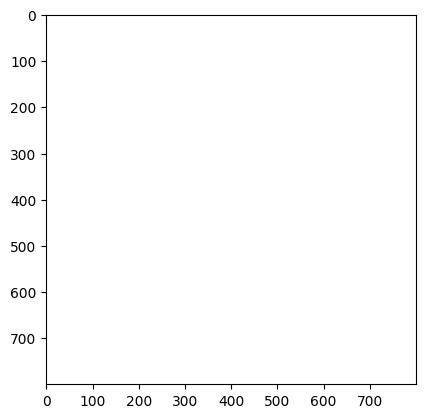

In [19]:
import os
import pandas as pd
import numpy as np
import cv2
import PIL
from PIL import Image

%matplotlib inline
from matplotlib import pyplot as plt

# LOAD NUMPY ARRAY
np_path1 = '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt3.npy'
np_path2 = '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt5.npy'
np_path3 = '/media/HDD/rheology2023/Blood_Viscosity/npyfiles_dataset/SSD_Backup/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805/NBL19_D0_30HZ_20XINF_UWELL_25660117_141805_idt7.npy'

# getnpy_i = getnpy[0]
# FILE_NUMPYARRAY = glob.glob(f"{getnpy_i}/*")
# print(len(FILE_NUMPYARRAY))
# FILE_NUMPYARRAY_i = FILE_NUMPYARRAY[0]
LOADNUMPYARRAY_c1 = np.load(np_path1, allow_pickle = True)
channel_1 = np.log(LOADNUMPYARRAY_c1)

LOADNUMPYARRAY_c2 = np.load(np_path2, allow_pickle = True)
channel_2 = np.log(LOADNUMPYARRAY_c2)

LOADNUMPYARRAY_c3 = np.load(np_path3, allow_pickle = True)
channel_3 = np.log(LOADNUMPYARRAY_c3)

# merge the image back together again
#merged_channel = cv2.merge([channel_1, channel_2, channel_3])
#merged_channel = cv2.merge([LOADNUMPYARRAY_c1, LOADNUMPYARRAY_c2, LOADNUMPYARRAY_c3]) ##GRB
merged_channel = cv2.merge([LOADNUMPYARRAY_c2, LOADNUMPYARRAY_c2, LOADNUMPYARRAY_c3])  ## RGB
print(merged_channel.shape)
plt.imshow(merged_channel)
#plt.imshow(np.log(merged_channel))

In [11]:
merged_channel

array([[[2.21898342e+08, 2.55019032e+08, 2.68777583e+08],
        [4.39557815e+06, 5.41046062e+06, 3.74556691e+06],
        [3.31571556e+06, 2.50214929e+06, 2.21651312e+06],
        ...,
        [2.98252261e+06, 2.39121839e+06, 1.86265260e+06],
        [3.31571556e+06, 2.50214929e+06, 2.21651312e+06],
        [4.39557815e+06, 5.41046062e+06, 3.74556691e+06]],

       [[3.10062473e+06, 3.82845949e+06, 2.57846670e+06],
        [3.12349364e+06, 2.72939616e+06, 2.51363308e+06],
        [3.48908403e+06, 1.87984572e+06, 2.86062594e+06],
        ...,
        [2.68501845e+06, 1.90988950e+06, 2.85378718e+06],
        [2.17568451e+06, 2.51615952e+06, 2.59057482e+06],
        [1.97675325e+06, 2.08014760e+06, 2.57897136e+06]],

       [[2.42238254e+06, 2.62024295e+06, 2.19366582e+06],
        [2.20368487e+06, 3.06913642e+06, 3.61547118e+06],
        [2.98052008e+06, 3.02389740e+06, 3.47893559e+06],
        ...,
        [2.76138805e+06, 2.19005092e+06, 2.05400464e+06],
        [2.37418499e+06, 2.83

In [ ]:
merged_channel

In [13]:
LOADNUMPYARRAY = np.load(np_path1, allow_pickle = True)

print(LOADNUMPYARRAY.shape)
LOADNUMPYARRAY

(800, 800)


array([[2.21898342e+08, 4.39557815e+06, 3.31571556e+06, ...,
        2.98252261e+06, 3.31571556e+06, 4.39557815e+06],
       [3.10062473e+06, 3.12349364e+06, 3.48908403e+06, ...,
        2.68501845e+06, 2.17568451e+06, 1.97675325e+06],
       [2.42238254e+06, 2.20368487e+06, 2.98052008e+06, ...,
        2.76138805e+06, 2.37418499e+06, 2.49542822e+06],
       ...,
       [1.98602611e+06, 3.22073801e+06, 1.44281687e+06, ...,
        2.23345737e+06, 2.17853808e+06, 1.48242008e+06],
       [2.42238254e+06, 2.49542822e+06, 2.37418499e+06, ...,
        1.96532513e+06, 2.98052008e+06, 2.20368487e+06],
       [3.10062473e+06, 1.97675325e+06, 2.17568451e+06, ...,
        2.20739048e+06, 3.48908403e+06, 3.12349364e+06]])

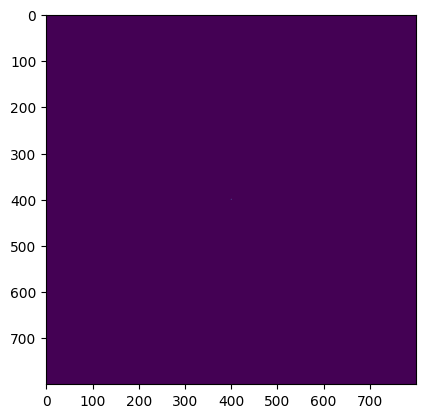

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(LOADNUMPYARRAY)

In [14]:
np.log(LOADNUMPYARRAY)

array([[19.21772992, 15.29610963, 15.01418401, ..., 14.90828001,
        15.01418401, 15.29610963],
       [14.94711418, 14.95446269, 15.0651498 , ..., 14.80319816,
        14.59285389, 14.49696628],
       [14.70026213, 14.60564146, 14.90760837, ..., 14.83124403,
        14.68016477, 14.7299709 ],
       ...,
       [14.50164627, 14.98512109, 14.18210792, ..., 14.61906133,
        14.59416461, 14.2091865 ],
       [14.70026213, 14.7299709 , 14.68016477, ..., 14.49116825,
        14.90760837, 14.60564146],
       [14.94711418, 14.49696628, 14.59285389, ..., 14.6073216 ,
        15.0651498 , 14.95446269]])

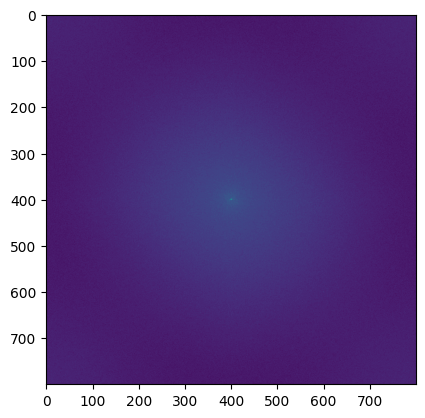

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(np.log(LOADNUMPYARRAY)) 

In [ ]:
# merge the image back together again
merged = cv2.merge([B, G, R])
cv2.imshow("Merged", merged)

372
29
(800, 800, 3)


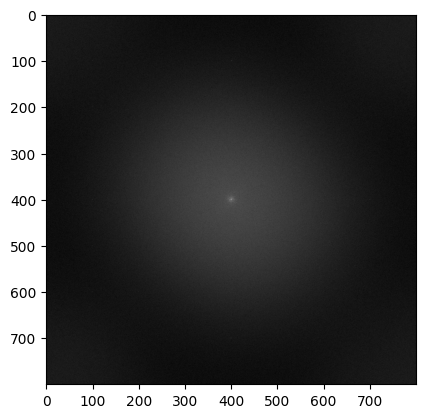

In [33]:
base_root_fft = "/media/HDD/rheology2023/Blood_Viscosity/2dFFT_dataset/SSD_Backup"
getFFT = glob.glob(f"{base_root_fft}/*")
print(len(getFFT))
#getFFT
FILE_IMG = glob.glob(f"{getFFT[0]}/*")
print(len(FILE_IMG))

imgidt_test = cv2.imread(FILE_IMG[0])
print(imgidt_test.shape)
#plt.imshow(imgidt_test,cmap='gray')  
plt.imshow(imgidt_test)  

In [40]:
(B, G, R) = cv2.split(imgidt_test)
B.shape

(800, 800)

In [41]:
G.shape

(800, 800)

In [42]:
R.shape

(800, 800)

In [34]:
imgidt_test

array([[[112, 112, 112],
        [ 42,  42,  42],
        [ 30,  30,  30],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 42,  42,  42]],

       [[ 35,  35,  35],
        [ 26,  26,  26],
        [ 27,  27,  27],
        ...,
        [ 28,  28,  28],
        [ 30,  30,  30],
        [ 31,  31,  31]],

       [[ 27,  27,  27],
        [ 28,  28,  28],
        [ 24,  24,  24],
        ...,
        [ 28,  28,  28],
        [ 31,  31,  31],
        [ 17,  17,  17]],

       ...,

       [[ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 25,  25,  25],
        [ 22,  22,  22],
        [ 28,  28,  28]],

       [[ 27,  27,  27],
        [ 17,  17,  17],
        [ 31,  31,  31],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 28,  28,  28]],

       [[ 35,  35,  35],
        [ 31,  31,  31],
        [ 30,  30,  30],
        ...,
        [ 24,  24,  24],
        [ 27,  27,  27],
        [ 26,  26,  26]]

In [ ]:
#img_name = '/media/SSD/rheology2023/Glycerol_FFT/GLY10/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_083046/FFT/GLY10P100_D0_30HZ_20XINF_UWELL_20221230_083046_idt1584.png'
imgidt_test = cv2.imread(img_name)
print(imgidt_test.shape)
#plt.imshow(imgidt_test,cmap='gray')  
plt.imshow(imgidt_test)  